# 2장. 컴퓨터 비전 소개

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch02/02-fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

## 의류 아이템 인식하기

In [1]:
import tensorflow as tf

# Fashion MNIST 데이터 로드

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


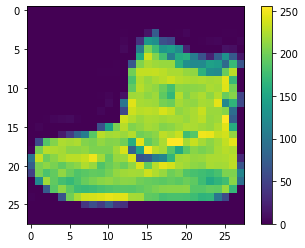

In [2]:
import matplotlib.pyplot as plt

# 이미지 샘플 모습 확인하기 28 x 28 x 1 (Grey: 0~255)

plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)

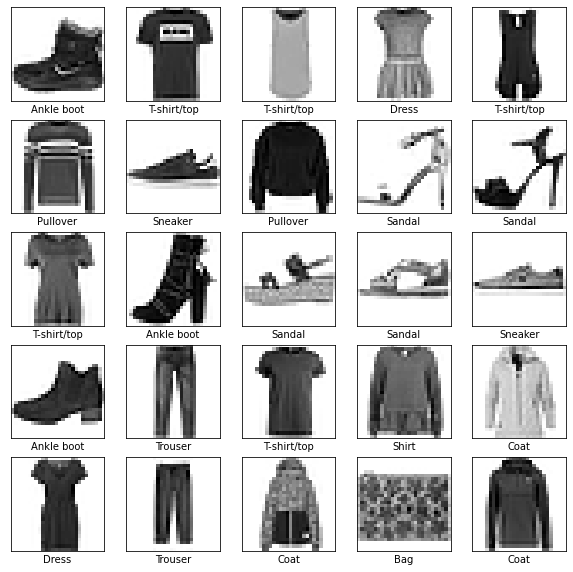

In [3]:
# 10개의 클래스 명칭 지정

CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


# 각 클래스별 샘플 이미지 확인

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(CLASSES[training_labels[i]])

In [4]:
# 학습용 6만개, 테스트용 1만개, 이미지 사이즈 28x28

print ('Training data:', training_images.shape, training_labels.shape)
print ('Test data:', test_images.shape, test_labels.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [5]:
from sklearn.model_selection import train_test_split

# validation data 분리 구성

training_images, validation_images, training_labels, validation_labels = train_test_split(training_images, training_labels, test_size=0.1, random_state=42)

In [6]:
# 데이터 정규화 (Data Normalization)

training_images  = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=5)

Epoch 1/5
1688/1688 [==============================] - 8s 3ms/step - loss: 0.5072 - accuracy: 0.8229 - val_loss: 0.3982 - val_accuracy: 0.8573
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3808 - accuracy: 0.8637 - val_loss: 0.4211 - val_accuracy: 0.8473
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3395 - accuracy: 0.8770 - val_loss: 0.3524 - val_accuracy: 0.8745
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.8852 - val_loss: 0.3382 - val_accuracy: 0.8795
Epoch 5/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2959 - accuracy: 0.8914 - val_loss: 0.3215 - val_accuracy: 0.8847


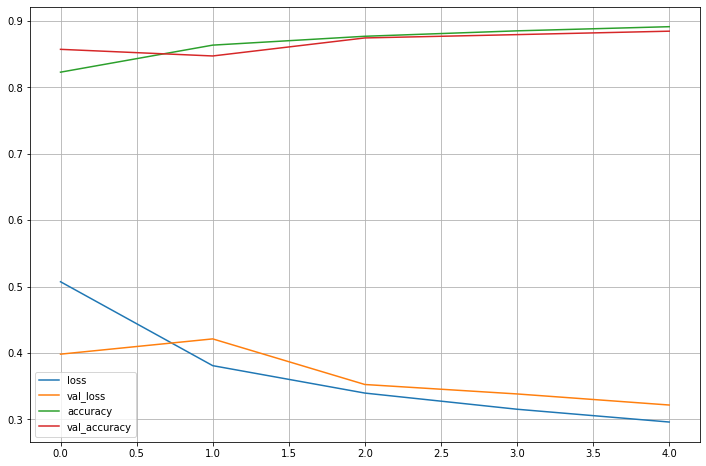

In [11]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8790


[0.3416740298271179, 0.8790000081062317]

## 모델 출력 살펴보기

In [13]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 1ms/step
[3.5952879e-05 1.3244229e-08 5.4070119e-07 2.5342538e-07 1.7643696e-06
 1.1055321e-03 2.7559037e-05 2.4503782e-02 3.7355587e-06 9.7432095e-01]
9


In [14]:
import numpy as np

np.argmax(classifications[0])

9

## 더 오래 훈련하기 - 과대적합 (Over-Fitting)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Epochs = 50 학습

hist = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=50)

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5030 - accuracy: 0.8242 - val_loss: 0.4325 - val_accuracy: 0.8460
Epoch 2/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8649 - val_loss: 0.3869 - val_accuracy: 0.8618
Epoch 3/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3382 - accuracy: 0.8774 - val_loss: 0.3531 - val_accuracy: 0.8750
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3140 - accuracy: 0.8851 - val_loss: 0.3430 - val_accuracy: 0.8798
Epoch 5/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2963 - accuracy: 0.8902 - val_loss: 0.3398 - val_accuracy: 0.8772
Epoch 6/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2813 - accuracy: 0.8963 - val_loss: 0.3377 - val_accuracy: 0.8757
Epoch 7/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2678 - accuracy: 0.9005 - val_loss: 0.3265 - val_accuracy:

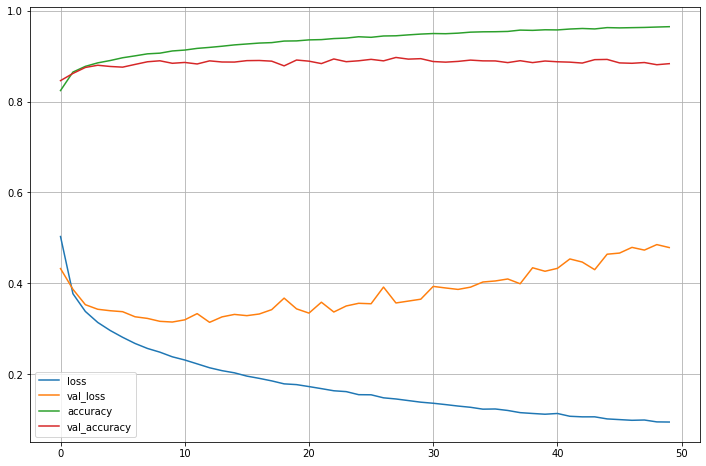

In [16]:
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.8839


[0.5319311022758484, 0.883899986743927]

## 훈련 조기 종료

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\n정확도 95%에 도달하여 훈련을 멈춥니다!")
            self.model.stop_training = True

In [19]:
callbacks = myCallback()

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

# model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])
hist = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=50, callbacks=[callbacks])

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5081 - accuracy: 0.8214 - val_loss: 0.4497 - val_accuracy: 0.8392
Epoch 2/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3814 - accuracy: 0.8633 - val_loss: 0.3915 - val_accuracy: 0.8600
Epoch 3/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3398 - accuracy: 0.8753 - val_loss: 0.3489 - val_accuracy: 0.8730
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3153 - accuracy: 0.8854 - val_loss: 0.3373 - val_accuracy: 0.8772
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2974 - accuracy: 0.8904 - val_loss: 0.3366 - val_accuracy: 0.8805
Epoch 6/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2813 - accuracy: 0.8966 - val_loss: 0.3320 - val_accuracy: 0.8788
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.9012 - val_loss: 0.3192 - val_accuracy:

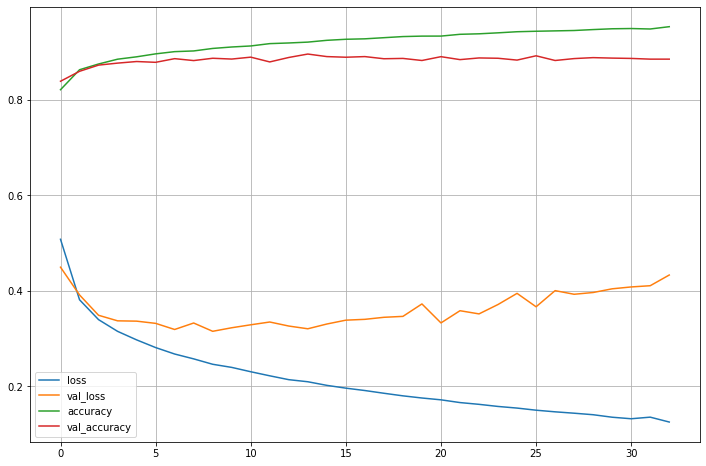

In [21]:
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()